In [1]:
# Deepak Saini

In [ ]:
print("Start of Code")

Start of Code


In [ ]:
# uninstall old version of scikit-learn, and install latest version of scikit-learn
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [ ]:
# confirm the current scikit-learn version
sklearn.__version__

'1.2.2'

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import scikit-learn function 'train_ test_split'
from sklearn.model_selection import train_test_split

# import scikit-learn function 'Decision Tree Classifier'
from sklearn.tree import DecisionTreeClassifier

# import scikit-learn function 'plot_tree' (it requires matplotlib to be installed)
from sklearn.tree import plot_tree

# import scikit-learn module 'metrics' (this module implements functions assessing prediction error for specific purposes, used for accuracy calculation)
from sklearn import metrics

# import scikit-learn function 'plot_confusion_matrix' to plot the confusion matrix
# from sklearn.metrics import plot_confusion_matrix
# Note: Function plot_confusion_matrix is deprecated in scikit-learn version 1.0 and removed in scikit-learn version 1.2 (latest version is 1.2.1 on 09-Feb-2023)

# import scikit-learn function 'ConfusionMatrixDisplay' to plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# import scikit-learn function 'accuracy_score' to calculate the accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# read the excel file data to create a pandas dataframe
path='/content/drive/MyDrive/IITK/MBA933 - Telco-Customer-Churn/Datafile.xlsx'
df = pd.read_excel(path)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# view the shape of dataframe
print(df.shape)
num_rows , num_cols = df.shape
print(num_rows)
print(num_cols)
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

(7043, 21)
7043
21
There are 7043 rows and 21 columns.


In [ ]:
# view name of columns in dataframe
list(df)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# view the datatypes in dataframe
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# view a sample of values in each column of dataframe
pd.Series({col:df[col].unique() for col in df})

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

In [ ]:
# view the count of unique values in each column of dataframe
# [Note: for data field column 'customerID', the count should equal to the number of rows in dataframe, to confirm that there is no duplicate records (tuples) in customer data]
df.describe(include='all').loc['unique', :]

customerID          7043
gender                 2
SeniorCitizen        NaN
Partner                2
Dependents             2
tenure               NaN
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       NaN
TotalCharges         NaN
Churn                  2
Name: unique, dtype: object

In [ ]:
# view unique values in each column of dataframe
for col in df:
    print(col)
    print(df[col].unique())
    print("-------------------------------------------------------------------------")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-------------------------------------------------------------------------
gender
['Female' 'Male']
-------------------------------------------------------------------------
SeniorCitizen
[0 1]
-------------------------------------------------------------------------
Partner
['Yes' 'No']
-------------------------------------------------------------------------
Dependents
['No' 'Yes']
-------------------------------------------------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-------------------------------------------------------------------------
PhoneService
['No' 'Yes']
-------------------------------------------------------------------------
MultipleLines
['No phone service' 'No' 

In [ ]:
# view the information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# convert data field column 'SeniorCitizen' from numeric to categorical variable
df['SeniorCitizen'] = df['SeniorCitizen'].astype(np.object)

In [ ]:
# convert integer type numeric variable 'tenure' to float type numeric variable, to enable use of fit() function
df['tenure'] = df['tenure'].astype(np.float64)

In [ ]:
# view the information about the data frame, with column 'SeniorCitizen' as categorical variable, and column 'tenure' as float type numeric variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check for null values in dataframe
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# view the statistical description of dataframe (for numeric columns)
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
# view the count of values in data field column 'Churn'
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

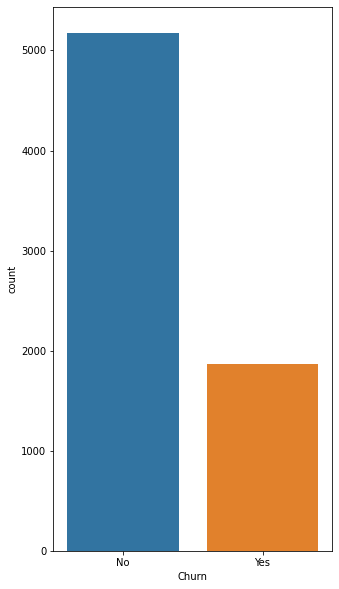

In [ ]:
# plot to visualize the the count of values in data field column 'Churn', using the seaborn library
plt.figure(figsize=(5,10));
sns.countplot(df['Churn']);

In [ ]:
# separate the independent variables (Xs) from dataframe, and check using 'head' [Note: 'customerID', being Nominal Data, is not included in Xs]
X = df.drop(['customerID', 'Churn'], axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [ ]:
# view the datatypes for Xs
X.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [ ]:
# One-Hot Encoding to convert categorical variables into dummy/indicator variables [Note: there should be 46 columns after One-Hot Encoding, as per the count of unique values in each column (as identified above)]
X_encoded = pd.get_dummies(X,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                                      'PhoneService', 'MultipleLines', 'InternetService',
                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                      'TechSupport',
                                      'StreamingTV', 'StreamingMovies',
                                      'Contract', 'PaperlessBilling', 'PaymentMethod'])
X_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34.0,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2.0,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45.0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2.0,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
# separate the dependent variable (Y) from dataframe, and check using 'head'
Y = df['Churn'].copy()
Y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
# view the datatype for Y
Y.dtype

dtype('O')

In [ ]:
# dtype('O') stands for (Python) objects, which in Pandas refers to a string (text)
# convert Y from categorical to float type numeric data, to enable use of fit() function

# for Y, map the values 'Yes' and 'No' to numeric values (to enable conversion of categorical variable Y to float type numeric variable), and check using 'head'
Y = Y.map({'No': 0, 'Yes': 1})
Y = Y.astype(np.float64)
Y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [ ]:
# Check datatype for Y
Y.dtype

dtype('float64')

In [ ]:
# Check the unique values for Y
Y.unique()

array([0., 1.])

In [ ]:
# split the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.3, random_state = 0)


In [ ]:
print("Completed 'train_test_split'.")

Completed 'train_test_split'.


In [ ]:
# create a decision tree using class 'DecisionTreeClassifier'
# Decision trees are a popular supervised learning method
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree = decision_tree.fit(X_train, Y_train)


In [ ]:
print("Fully grown decision tree has been created.")

Fully grown decision tree has been created.


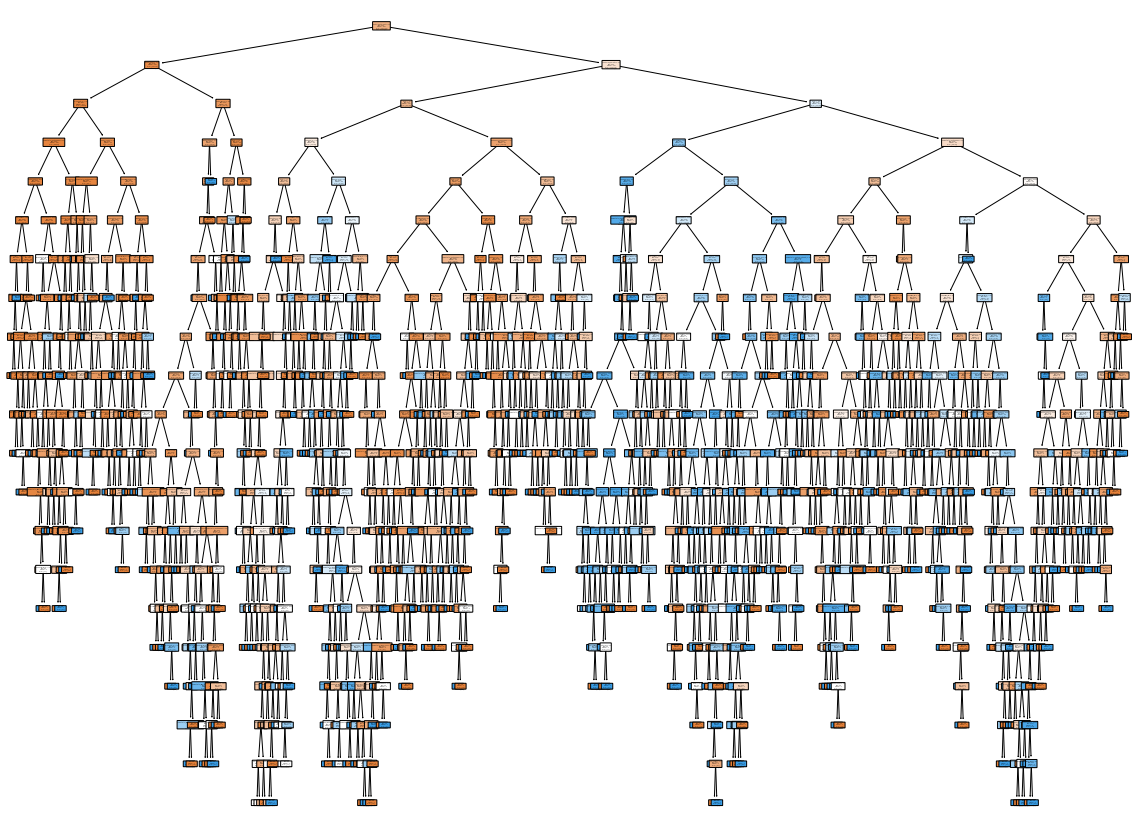

In [ ]:
# plot the decision tree using function 'plot_tree'
# [Note: Parameter 'class_names' contains names of each of the target classes in ascending numerical order.
#        Here, for data field column 'Churn', 'No' <=> 0 <=> "Churning_No", and 'Yes' <=> 1 <=> "Churning_Yes".]
plt.figure(figsize = (20, 15))
plot_tree (decision_tree, filled = True, rounded = True, class_names = ["Churning_No", "Churning_Yes"], feature_names = X_encoded.columns);

In [ ]:
print("Fully grown decision tree has been plotted.")

Fully grown decision tree has been plotted.


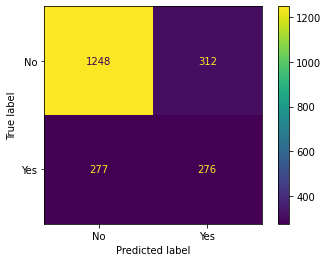

In [ ]:
# plot the confusion matrix

#plot_confusion_matrix(decision_tree,X_test, Y_test, display_labels=[["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]])

# predict the labels of the test set
Y_pred = decision_tree.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# create a confusion matrix display object
cm_display = ConfusionMatrixDisplay(cm, display_labels=["No", "Yes"])

# plot the confusion matrix
cm_display.plot()

In [ ]:
# view the count of a values for Y_train
Y_train.value_counts()

0.0    3614
1.0    1316
Name: Churn, dtype: int64

In [ ]:
# performing cost complexity pruning on decision tree model
# the 'alpha' values represent a complexity parameter for balancing between (a) the accuracy of model (using the training data), and (b) the complexity of model
path = decision_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity of Leaves vs. Effective Alpha for the Training Set')

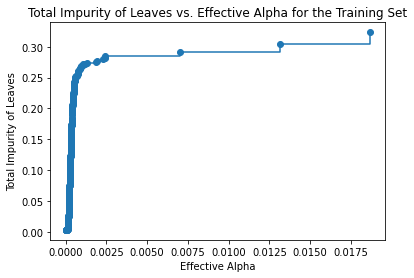

In [ ]:
# plot to visualize the relationship between the effective 'alpha' values and the total impurity of the leaves of the decision tree classifier for the training set
fig, ax = plt.subplots()
ax. plot(ccp_alphas[:-1], impurities[:-1], marker = "o" , drawstyle = "steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves" )
ax.set_title("Total Impurity of Leaves vs. Effective Alpha for the Training Set")

In [ ]:
# build decision tree classifiers with varying values of effective 'alpha'
# obtain the number of nodes in the last (i.e. the most complex) decision tree, along with the corresponding value of 'alpha'
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

print("The number of nodes in the last tree is {}, with ccp_alpha as {}.".format(
          clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

The number of nodes in the last tree is 1, with ccp_alpha as 0.06787922544214436.


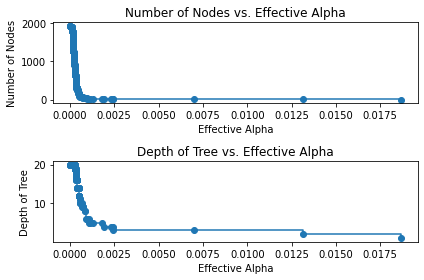

In [ ]:
# plot to visualize the relationship between the effective 'alpha' values and the number of nodes in the decision tree model
# plot to visualize the relationship between the effective 'alpha' values and the depth of the decision tree model

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker = "o", drawstyle = "steps-post")
ax[0].set_xlabel("Effective Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs. Effective Alpha")
ax[1].plot(ccp_alphas, depth, marker = "o" , drawstyle = "steps-post")
ax[1].set_xlabel("Effective Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth of Tree vs. Effective Alpha")
fig.tight_layout()

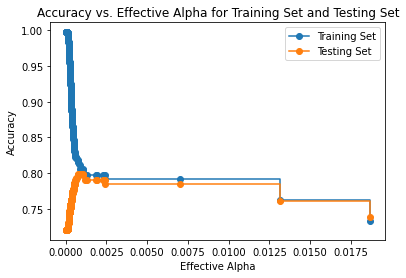

In [ ]:
# plotting the accuracy scores for the training set and testing set against different values of effective 'alpha'

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs. Effective Alpha for Training Set and Testing Set" )
ax.plot(ccp_alphas, train_scores, marker = "o", label = "Training Set", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = "o", label = "Testing Set", drawstyle = "steps-post")
ax.legend()
plt.show()

In [ ]:
# finding the value of effective 'alpha' for which accuracy of the decision tree model is maximum on testing set
max_accuracy = max(test_scores)
max_accuracy_index = test_scores.index(max_accuracy)
best_alpha = ccp_alphas[max_accuracy_index]
print("The maximum Accuracy on the Testing Set is {}.".format(max_accuracy))
print("The value of Effective Alpha corresponding to the maximum Accuracy on the Testing Set is {}.".format(best_alpha))

The maximum Accuracy on the Testing Set is 0.7993374349266446.
The value of Effective Alpha corresponding to the maximum Accuracy on the Testing Set is 0.0009025826767948402.


In [ ]:
# creating a decision tree using the value of effective 'alpha' for which accuracy of the decision tree model is maximum on Testing Set

# finding the value of effective 'alpha' for which accuracy is maximum
max_accuracy_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# creating a decision tree using the value of effective 'alpha'for which accuracy is maximum
decision_tree_pruned = DecisionTreeClassifier(random_state = 0, ccp_alpha = max_accuracy_alpha)
decision_tree_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0009025826767948402, random_state=0)

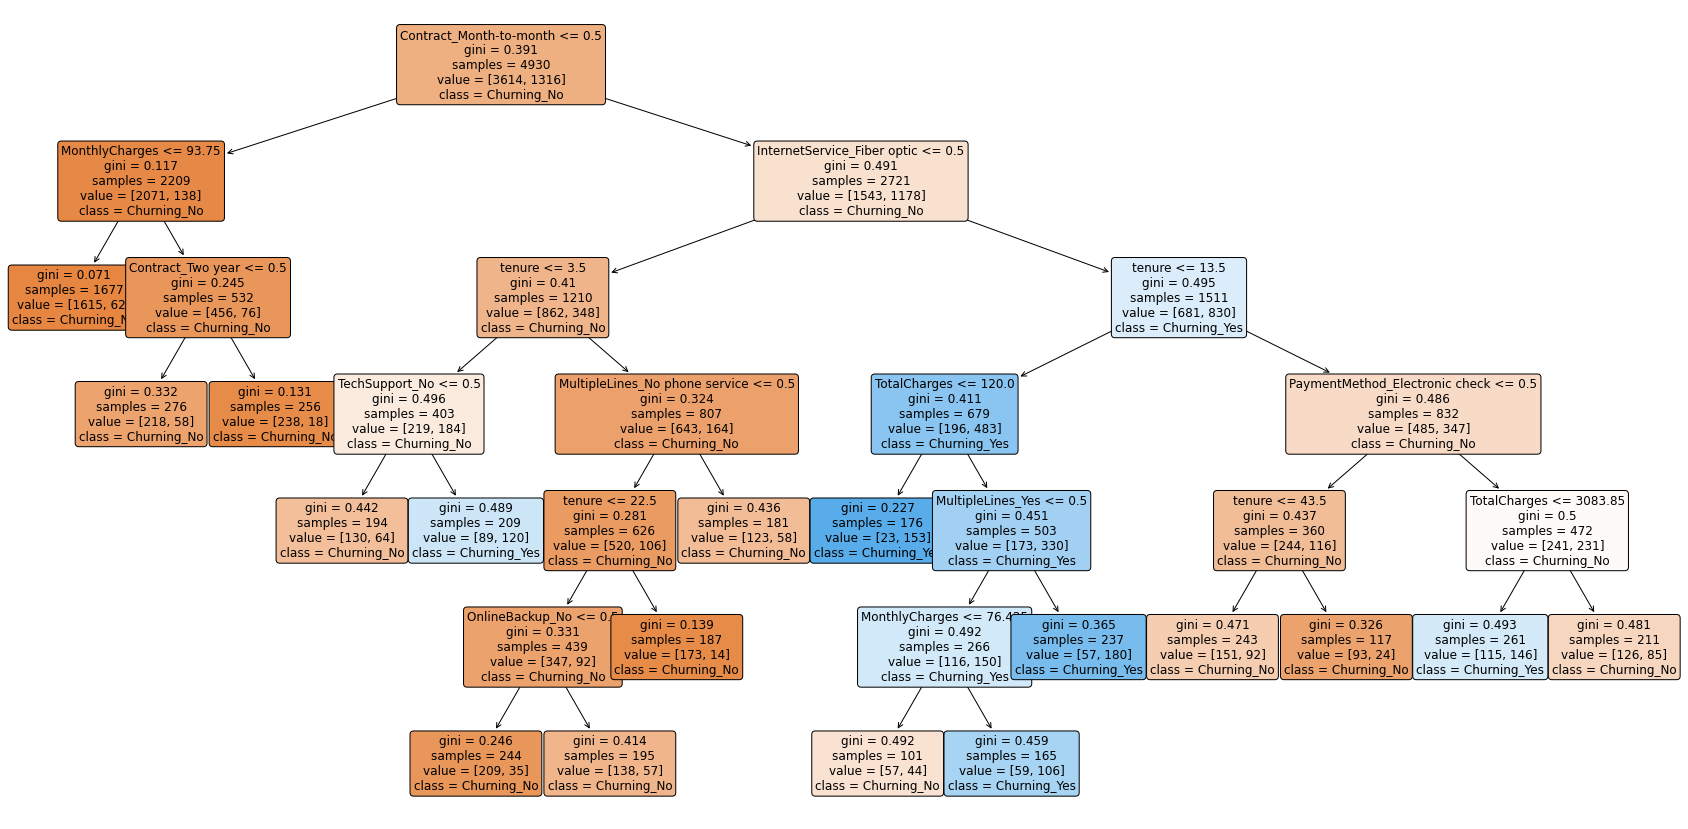

In [ ]:
# plot the pruned decision tree using function 'plot_tree'
# [Note: Parameter 'class_names' contains names of each of the target classes in ascending numerical order.
#        Here, for data field column 'Churn', 'No' <=> 0 <=> "Churning_No", and 'Yes' <=> 1 <=> "Churning_Yes".]
plt.figure(figsize = (30, 15))
plot_tree (decision_tree_pruned, filled = True, rounded = True, class_names = ["Churning_No", "Churning_Yes"], feature_names = X_encoded.columns, fontsize=12);

In [ ]:
print("Pruned decision tree has been created by using postpruning approach (minimal cost complexity pruning).")

Pruned decision tree has been created by using postpruning approach (minimal cost complexity pruning).


In [ ]:
print("Code ran sucessfully!")

Code ran sucessfully!


In [ ]:
print("End of Code")

End of Code


In [ ]:
# To Restart Runtime
# exit()